<a href="https://colab.research.google.com/github//pawel717-SCGE/lab1/blob/master/SCZ_Pawel_Suchanicz_Elzbieta_Dziedzic.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>
<h1>
Szeregi czasowe, giełda, ekonomia</h1>
<h2>
Sprawozdanie z laboratorium - MFDFA
</h2>
</center>

<p style="text-align: right">
    <b><i>Wykonali:</i></b><br>
<i>Paweł Suchanicz</i><br>
<i>Elżbieta Dziedzic</i>
</p>

# Algorytm MFDFA

In [9]:
import pylab as pl
import pandas as pd
import numpy as np
from MFDFA import MFDFA
from MFDFA import fgn
import matplotlib.pyplot as plt
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf
from scipy.fftpack import fft
import seaborn as sns
plt.rcParams["figure.figsize"] = (16,8)

In [10]:
df_data_puzzle = pd.read_csv('data_puzzle.dat', header=None)

In [11]:
t_final = 500
delta_t = 0.001

# Some drift thetea and difussion sigma parameters
theta = 0.3
sigma = 0.1

# The time array of the trajectory
time = np.arange(0, t_final, delta_t)

# The fractional Gaussian noise
H = 0.7
dB = (t_final ** H) * fgn(N = time.size, H = H)

# Initialise the array y
y = np.zeros([time.size])

# Integrate the process
for i in range(1, time.size):
    y[i] = y[i-1] - theta * y[i-1] * delta_t + sigma * dB[i]

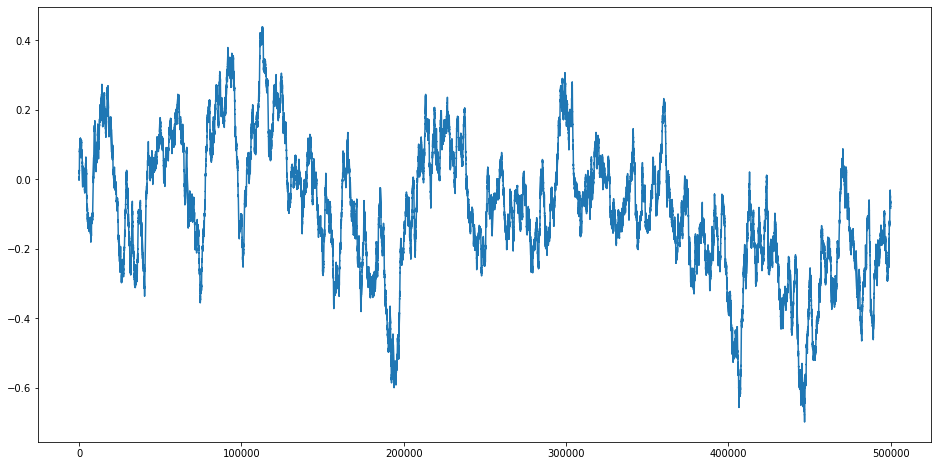

In [12]:
plt.plot(y)

### MFDFA w skali log-log

In [18]:
def get_qs_hqs():
    qs = []
    hqs = []
    for q in [x for x in range(-10, 11) if x != 0]:
        s, Fqs = MFDFA(y, lag = np.logspace(0.7, 4, 30).astype(int), q = q, order = 1)
        plt.loglog(s, Fqs, '-', linewidth = 0.5)
        s = np.array(np.log(s), dtype=np.float64)
        Fqs = np.array(np.log(Fqs), dtype=np.float64)
        slope = np.polyfit(s[5:-5], Fqs[5:-5], 1)[0][0]
        if np.isnan(slope):
            continue
        qs.append(q)
        hqs.append(slope)

    plt.legend(["MFDFA w skali log-log"])
    plt.xlabel("s (skala, lag)")
    plt.ylabel("F_qs_ (dfa)")
    plt.show()

    return qs, hqs

def plot_hqs(qs, hqs):
    plt.plot(qs, hqs)
    plt.legend(["Multifractional spectrum"])
    plt.xlabel("q")
    plt.ylabel("h(q)")
    plt.show()
    
def plot_tau(qs, tau):
    diff = np.max(tau) - np.min(tau)
    plt.ylim(np.min(tau) -0.1 * diff, np.max(tau) + 0.1 * diff)
    plt.plot(qs, tau)
    labels = ["Multifractional spectrum"]
    plt.legend(labels)
    plt.xlabel("q")
    plt.ylabel("tau(q)")
    plt.show() 

def plot_f_alpha(alpha, f_alpha): 
    plt.plot(alpha, f_alpha)
    
def derivative(x, f, i):
    return (f[i+1] - f[i]) / (x[i+1] - x[i])

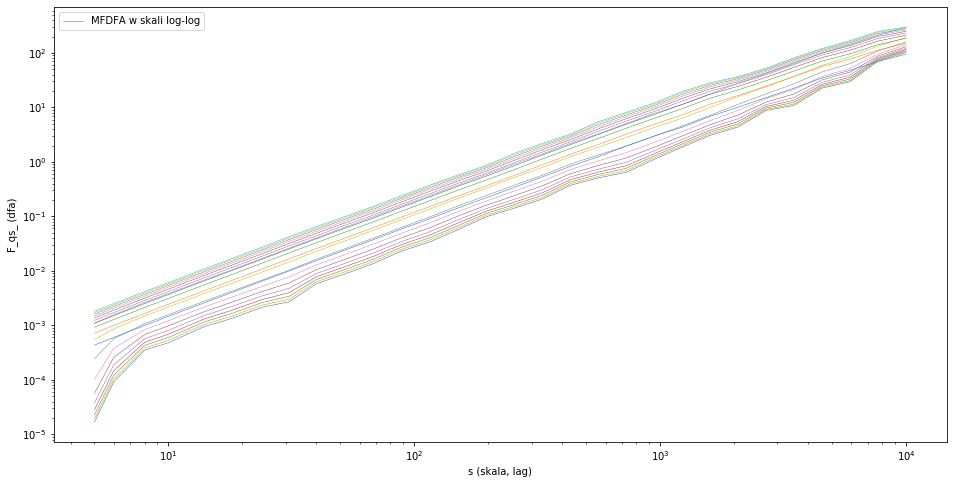

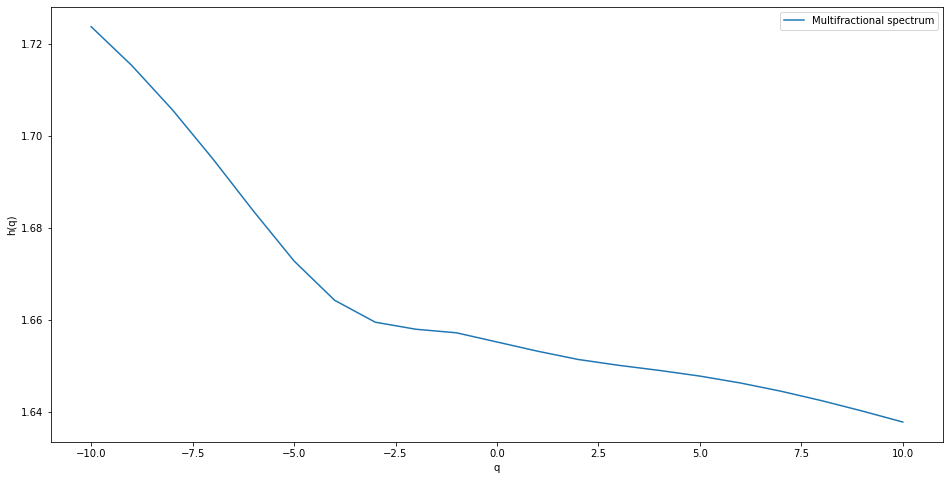

In [19]:
qs, hqs = get_qs_hqs()
plot_hqs(qs, hqs)

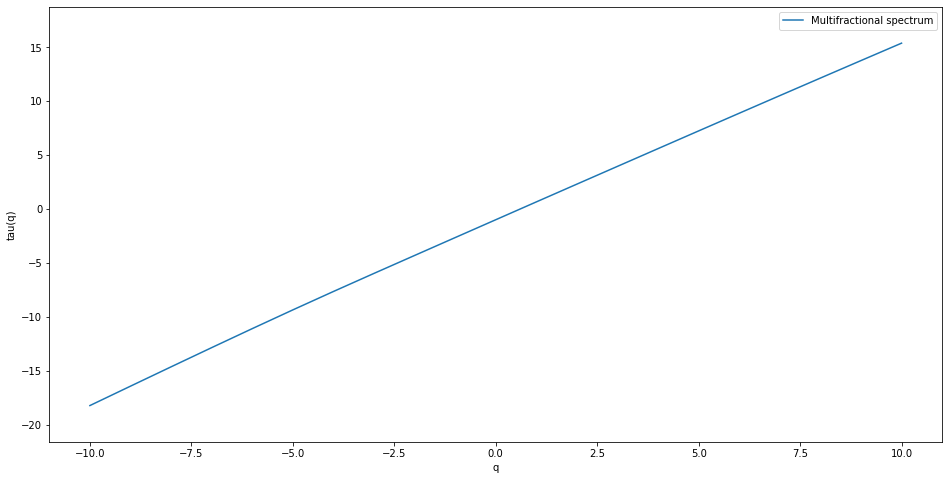

In [20]:
tau = [(a * b) - 1 for a,b in zip(qs, hqs)]
plot_tau(qs, tau)

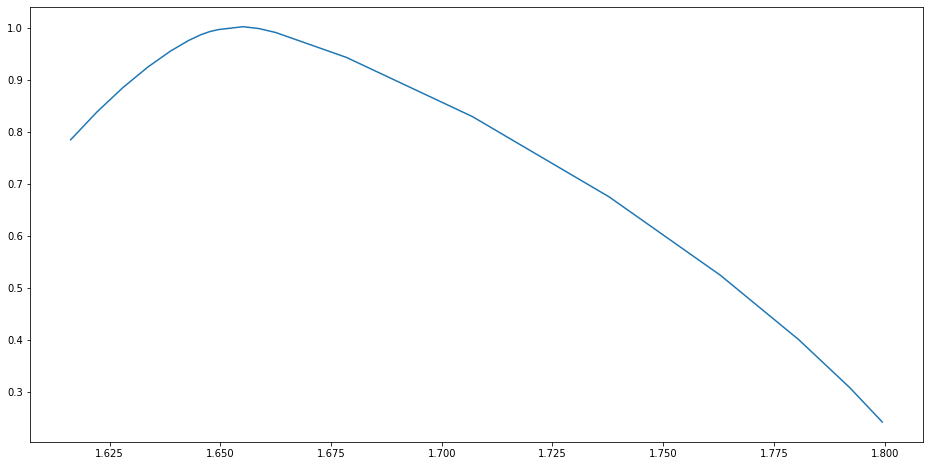

In [21]:
alphas = [derivative(qs, tau, i) for i in range(len(qs) -1)] 
f_alphas = [x*y-z for x, y, z in zip(qs, alphas, tau)]
plot_f_alpha(alphas, f_alphas)